Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and understand the Data

In [2]:
df=pd.read_csv(r'C:\Users\ramak\Downloads\Historical Tropical Storm\csv\hyd_v2.csv')
df.head()
df.info()
df.dtypes
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19110 entries, 0 to 19109
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   active              19110 non-null  bool   
 1   amenities           19110 non-null  object 
 2   balconies           19110 non-null  object 
 3   bathroom            19110 non-null  int64  
 4   combineDescription  0 non-null      float64
 5   completeStreetName  19108 non-null  object 
 6   deposit             19110 non-null  int64  
 7   facing              19110 non-null  object 
 8   facingDesc          9569 non-null   object 
 9   floor               19110 non-null  int64  
 10  furnishingDesc      19110 non-null  object 
 11  gym                 19110 non-null  bool   
 12  id                  19110 non-null  object 
 13  isMaintenance       19110 non-null  bool   
 14  lift                19110 non-null  bool   
 15  loanAvailable       19110 non-null  bool   
 16  loca

(19110, 36)

Assumptions and  Data Cleaning

In [3]:
# Standardizing columns names
df.columns=df.columns.str.strip().str.lower().str.replace(" ","_")

# Removing 'combineDescription' and 'weight' as there are no values in it
df.drop(columns=['combinedescription','weight'],inplace=True,errors='ignore')

# In completestreetname i filled Not_Mentioned rather than deleting(2 nans was there).
df['completestreetname'].fillna('Not_Mentioned',inplace=True)

# In facingdesc column i have nan, filled with Unknown rather than removing
df['facingdesc'].fillna('None',inplace=True)

# In locality column i have 6 NaN filled with 'Unknown'
df['locality'].fillna('Unknown',inplace=True)

df['reactivationsource'].fillna('Unknown',inplace=True)

# Converted this column to integer as string data type was there 
df['balconies']=pd.to_numeric(df['balconies'],errors='coerce').fillna(0).astype(int)

# Converted this column to integer as string data type was there
df['maintenanceamount']=pd.to_numeric(df['maintenanceamount'],errors='coerce').fillna(0).astype(int)

Checking for duplicates,empty spaces/strings exist or not

In [4]:
# As i have 969 total duplicate rows,i will remove it
df.duplicated().sum()

# removing duplicates
df=df.drop_duplicates()

# checking for empty spaces/values  (False means everything is okay)
(df=='').any().any()         

# if any empty cells/strings found replace with NaNs 
df.replace(r'^\s*$',pd.NA,regex=True,inplace=True)

In [5]:
# locality column was having inconsistencies like kondapur,kondapur, , ,kondapur, mygate,kondapur
df['locality_clean']=df['locality'].str.split(',').str[-1].str.strip().str.title()
# 
df = df[df['locality_clean'].str.replace(' ', '').str.isalpha()]

Q1. What is the average rent amount by locality?

In [6]:
#df.groupby('locality')['rent_amount'].mean().head()
df.groupby('locality_clean')['rent_amount'].mean().round(0).astype(int).reset_index().rename(columns={'rent_amount':'Avg_Rent_Amount'})

,locality_clean,Avg_Rent_Amount
0,A S Rao Nagar,9338
1,Aarambh Township Flat Owners Association Office,9500
2,Aasritha Residency,7000
3,Abhyudaya Nagar,12000
4,Abids,21833
...,...,...
1471,Zahur Cottage,8500
1472,Zamistanpur,11088
1473,Zamistanpur Post Office,10500
1474,Zehera Nagar,14000


In [7]:
df.groupby('locality_clean')['rent_amount'].mean().round(0).loc['Qutub Shahi Tombs']

13230.0

In [8]:
df.groupby('locality_clean')['rent_amount'].mean().round(0).loc['A S Rao Nagar']

9338.0

In [9]:
df[df['locality'].str.contains('Qutub Shahi Tombs',case=False,na=False)]['rent_amount'].mean()

13229.72972972973

In [10]:
df[df['locality_clean'].str.contains('Gachibowli',case=False,na=False)]['rent_amount'].mean().round(0).astype(int)

24301

Q2. How does rent amount vary with the number of bedrooms (type_bhk)?

In [11]:
df[(df['rent_amount']<3000) & (df['type_bhk']=='BHK1')]

,active,amenities,balconies,bathroom,completestreetname,deposit,facing,facingdesc,floor,furnishingdesc,...,property_size,reactivationsource,rent_amount,sharedaccomodation,shorturl,swimmingpool,totalfloor,type_bhk,watersupply,locality_clean
2072,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",0,1,"Janapriya Mahanagar, Lenin Nagar Near Janapri...",5000,None,None,0,Unfurnished,...,400,None,2500,False,http://nobr.kr/sv/LL2jj,False,1,BHK1,CORP_BORE,Meerpet
2844,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",0,1,"Venkatadri Theatre Land, Madhura Puri, Gaddi A...",5000,DK,Don't Know,3,Unfurnished,...,600,None,4,False,http://nobr.kr/sv/82ysj,False,3,BHK1,None,Dilsukhnagar
3147,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",1,2,"Chitrapuri Colony, Bagh Lingampalli,Near Divya...",4000,None,None,2,Unfurnished,...,450,OWNER,2000,False,http://nobr.kr/sv/KFnHj,False,3,BHK1,CORPORATION,Narayanaguda
8194,True,"{""INTERCOM"":false,""AC"":false,""RWH"":false,""HK"":...",1,1,"pragathi colony,meerpet,near sri chaitanya school",10000,N,North,2,Unfurnished,...,550,None,500,False,http://nobr.kr/sv/r36Qh,False,2,BHK1,BOREWELL,Meerpet
9684,True,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",1,1,"Siva Sai Puram, Near Post Office Badangpet",2500,W,West,0,Semi,...,900,PROPERTY_DASHBOARD,2500,False,http://nobr.kr/sv/ZfTb9,False,1,BHK1,CORP_BORE,Badangpet


Cleanup--Finding outliers

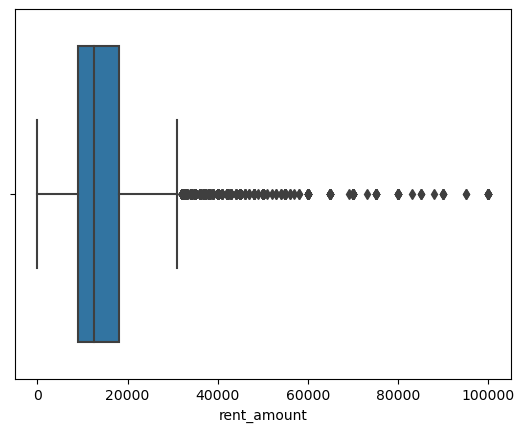

In [12]:
sns.boxplot(x=df['rent_amount'])
plt.show()

In [13]:
Q1=df['rent_amount'].quantile(0.25)
Q3=df['rent_amount'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# filtering outliers
outliers=df[(df['rent_amount'] < lower_bound) | (df['rent_amount'] > upper_bound)]

# removing outliers
df1=df[(df['rent_amount'] >= lower_bound) & (df['rent_amount'] <= upper_bound)]

In [14]:
df1.groupby('type_bhk')['rent_amount'].mean().round(0).astype(int)

type_bhk
BHK1         8383
BHK2        13537
BHK3        21063
BHK4        21612
BHK4PLUS    19700
RK1          5832
Name: rent_amount, dtype: int32

In [15]:
df1[df1['locality'].str.contains('LB Nagar',case=False,na=False)]['rent_amount'].mean().round(0).astype(int)

10187

In [16]:
# BHK 1: Rent between 4k and 18000
bhk1_filter=(df['type_bhk']=='BHK1') & (df['rent_amount']>=4000) & (df['rent_amount']<=18000)
# BHK2: Rent between 13000 and 30000
bhk2_filter=(df['type_bhk']=='BHK2') & (df['rent_amount']>=13000) & (df['rent_amount']<=30000)
# BHK3: Rent between 16000 and 45000
bhk3_filter=(df['type_bhk']=='BHK3') & (df['rent_amount']>=16000) & (df['rent_amount']<=45000)
# BHK4: Rent betwen 25k and 50k
bhk4_filter=(df['type_bhk']=='BHK4') & (df['rent_amount']>=25000) & (df['rent_amount']<=50000)
# BHK4PLUS: Rent between 35k and 70k
bhk4plus_filter=(df['type_bhk']=='BHK4PLUS') & (df['rent_amount']>=35000) & (df['rent_amount']<=70000)
# RK1: rent between 1800 and 6000
rk1_filter=(df['type_bhk']=='RK1') & (df['rent_amount']>=1800) & (df['rent_amount']<=6000)

final_filter= bhk1_filter | bhk2_filter | bhk3_filter | bhk4_filter | bhk4plus_filter | rk1_filter
df3=df[final_filter]
df3.head()

,active,amenities,balconies,bathroom,completestreetname,deposit,facing,facingdesc,floor,furnishingdesc,...,property_size,reactivationsource,rent_amount,sharedaccomodation,shorturl,swimmingpool,totalfloor,type_bhk,watersupply,locality_clean
0,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",3,3,"Shreya carnation, Block I, NCB Enclave, Gachib...",90000,W,West,3,Semi,...,2200,USER_DASHBOARD,28000,False,http://nobr.kr/sv/9Kvqj,False,5,BHK3,CORP_BORE,Gachibowli
2,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,"Rd Number 2, Shirdi Sai Nagar, Manikonda, Hyde...",80000,E,East,0,Semi,...,1800,MISSED_CALL,16000,False,http://nobr.kr/sv/TXJmj,False,3,BHK3,CORP_BORE,Manikonda
5,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":false,""AC"":...",3,3,Kondapur Main Road,66000,N,North,5,Semi,...,1517,MISSED_CALL,33000,False,http://nobr.kr/sv/KJPR6,True,6,BHK3,CORP_BORE,Kondapur
6,True,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":t...",1,2,"Wipro Junction, Gachibowli, Hyderabad, Telanga...",60000,E,East,20,Semi,...,1198,None,29000,False,http://nobr.kr/sv/BxQcc,True,24,BHK3,CORP_BORE,Gachibowli
9,True,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,"Azaan International School, 7 Tombs Road, Arun...",28000,SW,South-West,5,Unfurnished,...,950,MISSED_CALL,14000,False,http://nobr.kr/sv/Rckv3,False,6,BHK2,CORP_BORE,Toli Chowki


In [17]:
df3.groupby('type_bhk')['rent_amount'].agg(mean='mean',min='min',max='max').round(1)

,mean,min,max
type_bhk,,,
BHK1,8370.5,4000,18000
BHK2,17001.9,13000,30000
BHK3,25791.7,16000,45000
BHK4,37408.7,25000,50000
BHK4PLUS,53848.5,35000,70000
RK1,4552.1,1800,6000


splitting amenities column: json -> python dictionary -> series(columns)

In [18]:
import json

# clean the amenities col to ignore empty or bad json rows
def safe_json_load(s):
    try:
        return json.loads(s)
    except:
        return {}
# amenities column is a json, converting it to a dictionary
df3_amenities = df3['amenities'].apply(safe_json_load).apply(lambda x: pd.Series(x, dtype='object'))
# merginf this back to original dataframe
df3 = pd.concat([df3.drop('amenities', axis=1), df3_amenities], axis=1)

In [19]:
columns=['id','INTERNET','AC','INTERCOM','POOL', 'CPA', 'FS', 'SERVANT','SC', 'GP','RWH','STP', 'HK', 'PB', 'VP']
df3.drop(columns=columns,inplace=True,errors='ignore')

In [20]:
df3.columns=df3.columns.str.lower()

In [21]:
df3 = df3.loc[:, ~df3.columns.duplicated()]

In [22]:
df3.columns

Index(['active', 'balconies', 'bathroom', 'completestreetname', 'deposit',
       'facing', 'facingdesc', 'floor', 'furnishingdesc', 'gym',
       'ismaintenance', 'lift', 'loanavailable', 'locality', 'localityid',
       'location', 'maintenanceamount', 'ownername', 'parking', 'parkingdesc',
       'propertytitle', 'propertytype', 'property_age', 'property_size',
       'reactivationsource', 'rent_amount', 'sharedaccomodation', 'shorturl',
       'swimmingpool', 'totalfloor', 'type_bhk', 'watersupply',
       'locality_clean', 'club', 'security', 'park'],
      dtype='object')

In [23]:
# filled with mode
df3['club']=df3['club'].fillna(df3['club'].mode()[0])

In [24]:
# deleted nan
df3[df3['security'].isna()].index
df3.drop(index=df3[df3['security'].isna()].index,inplace=True,errors='ignore')


Q1. What is the average rent amount by locality?

In [25]:
df3.groupby('locality')['rent_amount'].mean().loc['Gachibowli'].round(1)

23386.1

Q2.How does rent amount vary with the number of bedrooms (type_bhk)?

In [26]:
df3.groupby('type_bhk')['rent_amount'].agg(mean='mean',min='min',max='max').round(1)

,mean,min,max
type_bhk,,,
BHK1,8382.3,4000,18000
BHK2,17012.8,13000,30000
BHK3,25824.0,16000,45000
BHK4,37408.7,25000,50000
BHK4PLUS,53848.5,35000,70000
RK1,4550.9,1800,6000


Q3.What is the distribution of property sizes across different localities?

In [27]:
df3.groupby('locality')['property_size'].agg(mean='mean',min='min',max='max').head(5)

,mean,min,max
locality,,,
Chanda Nagar,1100.0,1100,1100
Kukatpally,800.0,800,800
Nacharam,730.0,730,730
Adikmet,585.0,585,585
Alluri Seetaramaraju Nagar,900.0,900,900


Q4. Is there a relationship between the floor number and the rent amount?

In [28]:
def categorize_floor(floor):
    if floor >=0 and floor <=2:
        return 'floors0-2'
    elif floor >=3 and floor <=6:
        return 'floors3-6'
    else:
        return 'floors6 and above'
    
    
    
df3['floor_cat']=df3['floor'].apply(categorize_floor)

In [29]:
df3.groupby('floor_cat')['rent_amount'].mean().round(1)

floor_cat
floors0-2            14521.7
floors3-6            18064.5
floors6 and above    29705.2
Name: rent_amount, dtype: float64

Q5. How does the furnishing status affect the rent amount?

In [30]:
df3.groupby('furnishingdesc')['rent_amount'].mean()

furnishingdesc
Full           23952.680036
Semi           19524.314295
Unfurnished    10376.298106
Name: rent_amount, dtype: float64

Q6.What is the average deposit required in different localities?

In [31]:
df3.groupby('locality')['deposit'].mean().round(1).loc['Gachibowli']

50408.8

Q7.How many properties offer both bike and car parking, and how does this affect
rent?

In [32]:
df3.groupby(['parking','propertytype']).size()

parking       propertytype
BOTH          RENT            6178
FOUR_WHEELER  RENT             744
NONE          RENT             608
TWO_WHEELER   RENT            4431
dtype: int64

In [33]:
df3.groupby('parking')['rent_amount'].mean().round(1)

parking
BOTH            20224.5
FOUR_WHEELER    22793.4
NONE             9129.9
TWO_WHEELER     10382.8
Name: rent_amount, dtype: float64

Q7. Are there differences in rent between properties facing different directions?

In [34]:
df.groupby('facingdesc')['rent_amount'].mean().round(1).head(4)

facingdesc
Don't Know    13967.8
East          16499.9
None          13469.4
North         15234.9
Name: rent_amount, dtype: float64

In [35]:
# How does the average property price vary by BHK (bedrooms)

In [36]:
df3.groupby('type_bhk')['rent_amount'].mean().round(1)

type_bhk
BHK1         8382.3
BHK2        17012.8
BHK3        25824.0
BHK4        37408.7
BHK4PLUS    53848.5
RK1          4550.9
Name: rent_amount, dtype: float64

how deposit varies furnishing status

In [38]:
df3.groupby('furnishingdesc')['deposit'].mean().round(1)

furnishingdesc
Full           57200.4
Semi           44242.7
Unfurnished    21033.3
Name: deposit, dtype: float64

Q. How does bathroom effect type_bhk ( means how bathroom related to bhk_type

In [42]:
df3.groupby('type_bhk')['bathroom'].mean().round(0)     # this will tell on an avg how many bathroom there for 1bhk,2 bhk 

type_bhk
BHK1        1.0
BHK2        2.0
BHK3        3.0
BHK4        4.0
BHK4PLUS    6.0
RK1         1.0
Name: bathroom, dtype: float64